In [57]:
import pandas as pd
import numpy as np
import json
import pickle
from utils.data_load import Data_load
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

In [2]:
config = json.load(open('./config.json', 'r'))
NATree, data_set = Data_load(config, 12, 4, 1, 1, 1)

In [3]:
X_train, y_train = data_set['train']['week'], data_set['train']['target']
X_test, y_test = data_set['test']['week'], data_set['test']['target']

In [4]:
X_train = X_train[:, 2, 0, :]
y_train = y_train[:, 2, :]
X_test = X_test[:, 2, 0, :]
y_test = y_test[:, 2, :]

In [23]:
std = data_set['X_std']
mean = data_set['X_mean']

In [29]:
train = X_test[:, 3]

In [30]:
#单位根检验-ADF检验
print(sm.tsa.stattools.adfuller(train))

(-2.104133107803079, 0.24285590924443556, 3, 58, {'1%': -3.548493559596539, '5%': -2.912836594776334, '10%': -2.594129155766944}, -35.90480089327174)


In [31]:
#白噪声检验
acorr_ljungbox(train, lags = [6, 12], boxpierce=True)

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
6,263.796212,4.606940e-54,242.460307,1.674053e-49
12,374.820992,8.037548e-73,334.499099,2.601280e-64


D:\Python_ENV\PYTORCH\Scripts\ASTGCN-origin-master\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Python_ENV\PYTORCH\Scripts\ASTGCN-origin-master\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Python_ENV\PYTORCH\Scripts\ASTGCN-origin-master\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 24207 (\N{CJK UNIFIED IDEOGRAPH-5E8F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Python_ENV\PYTORCH\Scripts\ASTGCN-origin-master\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21015 (\N{CJK UNIFIED IDEOGRAPH-5217}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Python_ENV\PYTORCH\Scripts\ASTGCN-origin-master\lib\site-packages\IPython\core\pylabt

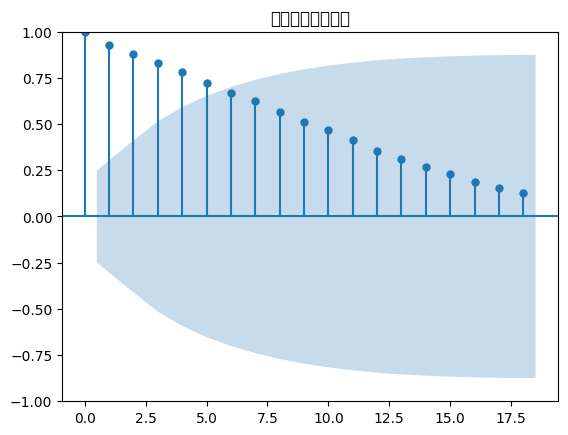

In [32]:
#计算ACF，PACF
acf = plot_acf(train)
plt.title("时间序列相关性图")
plt.show()

D:\Python_ENV\PYTORCH\Scripts\ASTGCN-origin-master\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20559 (\N{CJK UNIFIED IDEOGRAPH-504F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Python_ENV\PYTORCH\Scripts\ASTGCN-origin-master\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 33258 (\N{CJK UNIFIED IDEOGRAPH-81EA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Python_ENV\PYTORCH\Scripts\ASTGCN-origin-master\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Python_ENV\PYTORCH\Scripts\ASTGCN-origin-master\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Python_ENV\PYTORCH\Scripts\ASTGCN-origin-master\lib\site-packages\IPython\core\pylabt

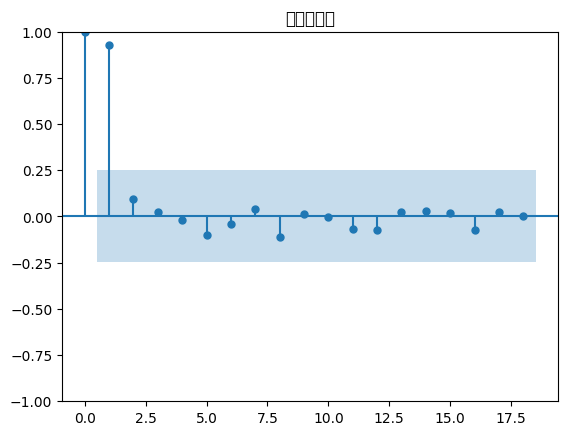

In [33]:
#计算PACF
pacf = plot_pacf(train)
plt.title("偏自相关图")
plt.show()

In [34]:
# ACF拖尾，PACF结尾 使用AR模型
#因为看自相关图和偏自相关图有很大的主观性，因此，可以通过AIC或BIC来确定最合适的阶数
trend_evaluate = sm.tsa.arma_order_select_ic(train, ic=['aic', 'bic'], trend='n', max_ar=20, max_ma=5)
print('train AIC', trend_evaluate.aic_min_order)
print('train BIC', trend_evaluate.bic_min_order)

D:\Python_ENV\PYTORCH\Scripts\ASTGCN-origin-master\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Python_ENV\PYTORCH\Scripts\ASTGCN-origin-master\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Python_ENV\PYTORCH\Scripts\ASTGCN-origin-master\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Python_ENV\PYTORCH\Scripts\ASTGCN-origin-master\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed t

train AIC (5, 1)
train BIC (1, 1)


D:\Python_ENV\PYTORCH\Scripts\ASTGCN-origin-master\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [51]:
#构建模型 p=5 ， q=1
model = sm.tsa.arima.ARIMA(train, order=(5, 0, 1))
arima_res = model.fit()
arima_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   62
Model:                 ARIMA(1, 0, 1)   Log Likelihood                  19.846
Date:                Fri, 11 Aug 2023   AIC                            -31.692
Time:                        10:09:56   BIC                            -23.183
Sample:                             0   HQIC                           -28.351
                                 - 62                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5730      1.040     -0.551      0.582      -2.612       1.466
ar.L1          0.9943      0.024     40.632      0.000       0.946       1.042
ma.L1         -0.3043      0.125     -2.429      0.015      -0.550      -0.059
sigma2         0.0290      0.005      6.081      0.000       0.020       0.038
===================================================================================
Ljung-Box (L1) (Q):                   0.88   Jarque-Bera (JB):                 2.89
Prob(Q):                              0.35   Prob(JB):                         0.24
Heteroskedasticity (H):               2.35   Skew:                             0.15
Prob(H) (two-sided):                  0.06   Kurtosis:                         4.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

1

In [52]:
y_rbf = arima_res.predict(1, 62)

In [22]:
y_rbf

array([-0.60089631, -1.81448344, -1.84971566, -1.8942615 , -1.83193052,
       -1.82001083, -1.77958432, -1.72321311, -1.7128738 , -1.67727896,
       -1.62503593, -1.51844316, -1.44046547, -1.37514838, -1.31017056,
       -1.2590276 , -1.13819551, -1.05724417, -0.9387886 , -0.86837891,
       -0.8524002 , -0.79810897, -0.7263142 , -0.72598315, -0.58554163,
       -0.43834611, -0.46920576, -0.41094034, -0.14638021, -0.19976265,
       -0.2262674 , -0.01966709, -0.26463791, -0.24231778,  0.01620839,
       -0.07772254,  0.4040629 ,  0.19961183,  0.10851665,  0.33385883,
        0.20566004,  0.00348782,  0.13225015, -0.01673504,  0.03056955,
       -0.01436885,  0.10027396,  0.04147866,  0.10911945,  0.1582669 ,
        0.10973183,  0.23593406,  0.12929756,  0.27424821,  0.48719938,
        0.29502381,  0.40845231,  0.49719826,  0.61001682,  0.36065397,
        0.44575668,  0.59710061])

In [53]:
y_rbf_tr = (y_rbf*std)+mean

In [54]:
y_rbf_tr

array([16.97864053, 17.27887204, 18.05734186, 18.35455343, 18.54527938,
       19.8973516 , 20.54619003, 24.14713675, 25.56230675, 27.07705182,
       28.13950568, 28.87126993, 33.33774254, 34.47731173, 38.38179705,
       38.70424228, 39.23788927, 40.82208999, 41.63685189, 44.39231518,
       45.27208089, 50.67652203, 50.54905139, 49.79327964, 56.80202189,
       57.22819424, 57.76566013, 56.9645764 , 55.57175472, 56.03281104,
       58.86184434, 64.56788378, 71.35557916, 68.1223192 , 65.55542013,
       63.53345988, 71.34028559, 63.88923955, 62.33915884, 62.05096958,
       62.99477096, 65.17332255, 63.8316133 , 65.21267783, 65.44336109,
       66.84085269, 67.8282274 , 67.57783322, 67.77709378, 69.69314636,
       75.6032165 , 74.25283095, 72.04033101, 73.79600235, 80.94136694,
       74.7066651 , 73.25448877, 75.39876172, 79.08607246, 78.28410567,
       76.86562342, 78.55894648])

In [50]:
y_rbf_tr_1 = pd.DataFrame(y_rbf_tr)
y_rbf_tr_1.to_csv('./results/ARIMA//pred_1.csv',  header=None, index=False)

In [63]:
y_rbf_all = []

In [62]:
future = 4
for item in range(future):
    train = X_test[:, item]
    trend_evaluate = sm.tsa.arma_order_select_ic(train, ic=['aic', 'bic'], trend='n', max_ar=20, max_ma=5)
    model = sm.tsa.arima.ARIMA(train, order=(trend_evaluate.aic_min_order[0], 0, trend_evaluate.aic_min_order[1]))
    # model = sm.tsa.arima.ARIMA(train, order=(5, 0, 1))
    arima_res = model.fit()
    with open('./results/ARIMA/arima{}.pkl'.format(item), 'wb') as f:
        pickle.dump(arima_res, f)
    arima_res.summary()
    y_tmp = arima_res.predict(1, 62)
    y_rbf_all.append(y_tmp)

D:\Python_ENV\PYTORCH\Scripts\ASTGCN-origin-master\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Python_ENV\PYTORCH\Scripts\ASTGCN-origin-master\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Python_ENV\PYTORCH\Scripts\ASTGCN-origin-master\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Python_ENV\PYTORCH\Scripts\ASTGCN-origin-master\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed t

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [64]:
future = 4
for item in range(future):
    with open('./results/ARIMA/arima{}.pkl'.format(item), 'rb') as f:
        arima_res = pickle.load(f)
    y_tmp = arima_res.predict(1, 62)
    y_rbf_all.append(y_tmp)

In [67]:
y_rbf_all = np.array(y_rbf_all)
y_rbf_all = np.transpose(y_rbf_all)

In [68]:
y_rbf_all = (y_rbf_all*std) + mean

In [70]:
y_rbf_df = pd.DataFrame(y_rbf_all)
y_rbf_df.to_csv('./results/ARIMA/pred_2.csv',  header=None, index=False)

In [71]:
y_test_tr = (y_test * std) + mean
y_test_tr = pd.DataFrame(y_test_tr)
y_test_tr.to_csv('./results/ARIMA/true_1.csv',  header=None, index=False)

In [75]:
y_test_tr = np.array(y_test_tr)
y_rbf_all = np.array(y_rbf_all)

In [76]:
#求mae，rmse
val_index = {}
val_index['MAE'] = []
val_index['RMSE'] = []
val_index['MAPE'] = []

In [77]:
time_slice = [1, 2, 3]
for item in time_slice:
    pred_index = y_rbf_all[item-1]
    val_target_index = y_test_tr[item-1]
    #mae
    mae = np.mean(np.abs(val_target_index - pred_index))
    #remse
    rmse = np.sqrt(np.mean((val_target_index-pred_index)**2))
    #mape
    mape = np.mean(np.abs(val_target_index-pred_index)/(pred_index + 1e-5))
    val_index['MAE'].append(mae)
    val_index['RMSE'].append(rmse)
    val_index['MAPE'].append(mape)

In [78]:
val_index

{'MAE': [5.142064310480205, 7.0184071725914325, 8.450705532712568],
 'RMSE': [5.716669898937524, 7.315437706746204, 8.597658280194407],
 'MAPE': [0.3251270607221506, 0.4350077453766312, 0.5099701431522894]}

In [79]:
val_index1 = pd.DataFrame(val_index)

In [81]:
val_index1

,MAE,RMSE,MAPE
0,5.142064,5.716670,0.325127
1,7.018407,7.315438,0.435008
2,8.450706,8.597658,0.509970


In [80]:
val_index1.to_csv(r'./results/ARIMA/mae.csv', index=False, sep=',', encoding='utf-8')